In [89]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/Users/irynaoleinikova/Documents/Ironhack/Projects/Project-4 ML/Post Performance (Readdle) January 1, 2024 - April 30, 2024.csv")

# the first few rows and data types
print("Initial Columns and Types:")
print(df.dtypes)
print(df.head())

Initial Columns and Types:
Date                                     object
Post ID                                  object
Network                                  object
Post Type                                object
Content Type                             object
                                         ...   
Subscribers Lost from Video             float64
Video Removed from Playlists            float64
Average Video Time Watched (Seconds)    float64
Poll Votes                              float64
Tags                                    float64
Length: 65, dtype: object
                 Date              Post ID Network Post Type Content Type  \
0  1/11/2024 12:33 pm  1745408480041648190       X   '@Reply         Text   
1    2/1/2024 3:52 pm  1753068714759782820       X   '@Reply         Text   
2   4/18/2024 5:46 pm  1780986225714700757       X   '@Reply         Text   
3   2/12/2024 2:24 pm  1757032822781489494       X   '@Reply        Video   
4    4/1/2024 3:58 pm  17747984864

In [90]:
# Converting 'Date' column 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

columns_to_drop = [
    'Sent by', 'Post ID', 'Post Type', 'Link', 'Post', 'SproutLink Clicks',
    'Subscribers Gained from Video', 'Hashtag Video Views',
    'Estimated Minutes Watched', 'Story Taps Back', 'Story Taps Forward',
    'Story Exits', 'Story Replies', 'Video Added to Playlists',
    'Subscribers Lost from Video', 'Video Removed from Playlists',
    'Poll Votes', 'Tags', 'Post', 'Link'
]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')


In [91]:
# Checking the cleaned data
print("Cleaned Data Preview:")
print(df.head())
print(df.info())

Cleaned Data Preview:
                 Date              Post ID Network Post Type Content Type  \
0 2024-01-11 12:33:00  1745408480041648190       X   '@Reply         Text   
1 2024-02-01 03:52:00  1753068714759782820       X   '@Reply         Text   
2 2024-04-18 05:46:00  1780986225714700757       X   '@Reply         Text   
3 2024-02-12 02:24:00  1757032822781489494       X   '@Reply        Video   
4 2024-04-01 03:58:00  1774798486493335951       X      Post        Photo   

        Profile Sent by                                               Link  \
0  '@PDFExpert_          https://twitter.com/PDFExpert_/status/17454084...   
1  '@PDFExpert_          https://twitter.com/PDFExpert_/status/17530687...   
2  '@PDFExpert_          https://twitter.com/PDFExpert_/status/17809862...   
3  '@PDFExpert_          https://twitter.com/PDFExpert_/status/17570328...   
4  '@PDFExpert_          https://twitter.com/PDFExpert_/status/17747984...   

                                              

In [92]:
# Feature Engineering

# 1. Extracting hour of the day from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# 2. Extracting day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# 3. Calculating post length (number of characters)
df['PostLength'] = df['Post'].astype(str).apply(len)

# 4. Calculating word count in the post
df['PostWordCount'] = df['Post'].astype(str).apply(lambda x: len(x.split()))

# 5. One-hot encoding the 'Platform' column
df = pd.get_dummies(df, columns=['Network'], prefix='Network')

# Previewing the engineered features
print(df[['Date', 'Hour', 'DayOfWeek', 'PostLength', 'PostWordCount'] + 
                 [col for col in df.columns if col.startswith('Platform_')]].head())


                 Date  Hour  DayOfWeek  PostLength  PostWordCount
0 2024-01-11 12:33:00  12.0        3.0         265             42
1 2024-02-01 03:52:00   3.0        3.0         177             30
2 2024-04-18 05:46:00   5.0        3.0          81             12
3 2024-02-12 02:24:00   2.0        0.0          67              4
4 2024-04-01 03:58:00   3.0        0.0         294             41


In [93]:
# Checking missing values in the whole dataset
print("Missing values in df:")
print(df.isnull().sum())


Missing values in df:
Date                39
Post ID              0
Post Type            0
Content Type         0
Profile              0
                    ..
PostLength           0
PostWordCount        0
Network_Facebook     0
Network_TikTok       0
Network_X            0
Length: 71, dtype: int64


In [94]:
df = df.fillna(df.mean(numeric_only=True))

In [95]:
print("Missing 'Date' values:", df['Date'].isnull().sum())

Missing 'Date' values: 39


In [96]:
median_date = df['Date'].median()
df['Date'] = df['Date'].fillna(median_date)

In [97]:
# What type of content engages the best?
# Converting Engagements column to numeric, forcing errors to NaN
df["Engagements"] = pd.to_numeric(df["Engagements"], errors="coerce")

# Now grouping and computing the mean
df.groupby("Content Type")["Engagements"].mean().sort_values(ascending=False)
df.groupby("Network_X")["Engagements"].mean().sort_values(ascending=False)


Network_X
False    163.800000
True      33.987952
Name: Engagements, dtype: float64

In [98]:
df.groupby("Network_Facebook")["Engagements"].mean().sort_values(ascending=False)

Network_Facebook
True     161.352941
False     39.000000
Name: Engagements, dtype: float64

In [99]:
df.groupby("Network_TikTok")["Engagements"].mean().sort_values(ascending=False)

Network_TikTok
True     177.666667
False     55.640000
Name: Engagements, dtype: float64

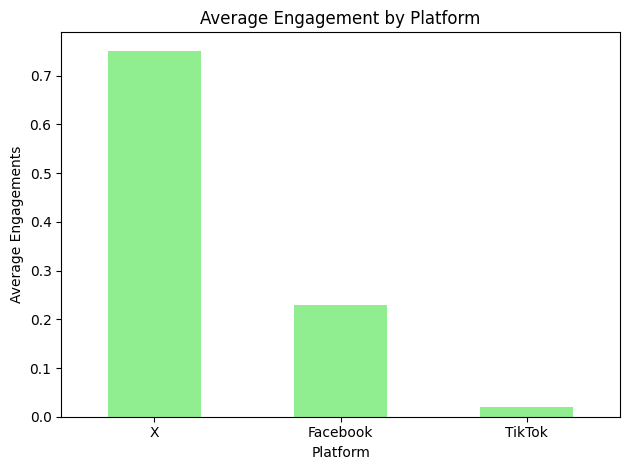

In [100]:
# Which platform (Network) drives the highest engagement?
import matplotlib.pyplot as plt

# Select platform columns
platform_columns = ["Network_TikTok", "Network_Facebook", "Network_X"]

# Calculate mean engagement for each platform
q2_result = df[platform_columns].mean().sort_values(ascending=False)

# Clean up names for plotting
q2_result.index = q2_result.index.str.replace("Network_", "")

# Plotting
q2_result.plot(kind='bar', color='lightgreen')
plt.title("Average Engagement by Platform")
plt.ylabel("Average Engagements")
plt.xlabel("Platform")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



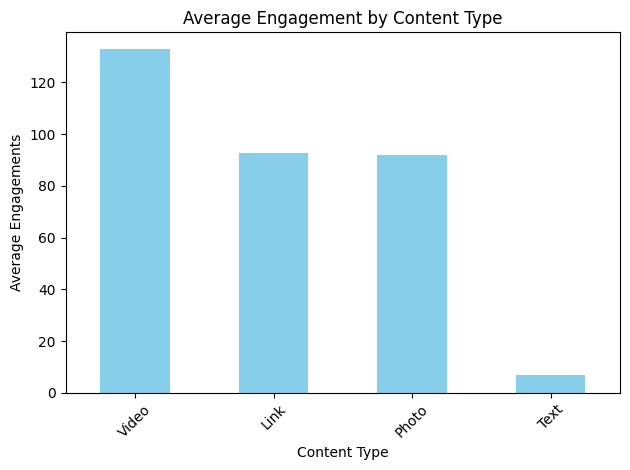

In [101]:
import matplotlib.pyplot as plt

# Groupped by 'Content Type' and calculate mean engagement
q1_result = df.groupby("Content Type")["Engagements"].mean().sort_values(ascending=False)

# Plotting
q1_result.plot(kind='bar', color='skyblue')
plt.title("Average Engagement by Content Type")
plt.ylabel("Average Engagements")
plt.xlabel("Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [102]:
#Top Performing Posts
df.sort_values(by='Engagements', ascending=False).head(10)

,Date,Post ID,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,...,Average Video Time Watched (Seconds),Poll Votes,Tags,Hour,DayOfWeek,PostLength,PostWordCount,Network_Facebook,Network_TikTok,Network_X
89,2024-02-22 03:27:00,7340555888043887877,Post,Video,pdfexpert,,https://www.tiktok.com/@pdfexpert/video/734055...,🤔 📖 The go-to app for iPad reading? You guesse...,NaN,"60,798",...,8.19000,NaN,NaN,5.033898,1.533898,280,42,False,True,False
79,2024-01-30 05:42:00,203472453481923_1173569710360407,Post,Link,PDF Expert,,https://www.facebook.com/817852325932149/posts...,"🌟 Meet Giorgia Calvi, TikTok vlogger with 40k ...",http://pdfexpert.com/blog/user-story-giorgia,"25,425",...,3.81375,NaN,NaN,5.000000,1.000000,385,53,True,False,False
88,2024-02-26 03:25:00,203472453481923_1192108645173180,Post,Link,PDF Expert,,https://www.facebook.com/817852325932149/posts...,📱💡 Unlock the full potential of your iPad with...,https://pdfexpert.com/blog/how-to-take-notes-o...,"35,980",...,3.81375,NaN,NaN,3.000000,0.000000,221,37,True,False,False
47,2024-02-14 04:56:00,203472453481923_1184170902633621,Post,Photo,PDF Expert,,https://www.facebook.com/817852325932149/posts...,Valentine's Day is the perfect day to celebrat...,https://www.facebook.com/817852325932149/posts...,"6,221",...,3.81375,NaN,NaN,4.000000,2.000000,218,39,True,False,False
48,2024-04-17 01:11:00,1780554651378634950,Post,Video,'@PDFExpert_,,https://twitter.com/PDFExpert_/status/17805546...,Measurement tools are now on Mac 🖥️ 📏\n\nWe've...,"http://bit.ly/pdfe_mac, https://twitter.com/PD...","6,178",...,3.81375,NaN,NaN,1.000000,2.000000,292,47,False,False,True
94,2024-02-02 02:21:00,203472453481923_1175528363497875,Post,Video,PDF Expert,,https://www.facebook.com/817852325932149/video...,"The future is here! PDF Expert, a pioneer on t...",https://www.facebook.com/817852325932149/video...,"43,555",...,3.47000,NaN,NaN,2.000000,4.000000,691,117,True,False,False
87,2024-04-22 08:47:00,203472453481923_1231227474594630,Post,Photo,PDF Expert,,https://www.facebook.com/817852325932149/posts...,"🌎 Today, the world marks #EarthDay! \n\nLet's ...",https://www.facebook.com/photo.php?fbid=123122...,"24,244",...,3.81375,NaN,NaN,8.000000,0.000000,297,48,True,False,False
92,2024-02-01 05:30:00,203472453481923_1174948730222505,Post,Video,PDF Expert,,https://www.facebook.com/817852325932149/video...,📱✨ Ready to unlock new dimensions of productiv...,https://www.facebook.com/817852325932149/video...,"36,661",...,3.33000,NaN,NaN,5.000000,3.000000,112,19,True,False,False
81,2024-03-12 01:31:00,203472453481923_1201772417540136,Post,Photo,PDF Expert,,https://www.facebook.com/817852325932149/posts...,🍎 How about giving your iPad an upgrade with s...,https://www.facebook.com/photo.php?fbid=120177...,"12,963",...,3.81375,NaN,NaN,1.000000,1.000000,352,55,True,False,False
46,2024-02-02 02:08:00,1753404988636713234,Post,Video,'@PDFExpert_,,https://twitter.com/PDFExpert_/status/17534049...,"PDF Expert, a pioneer on the original App Stor...",https://twitter.com/PDFExpert_/status/17534049...,"3,915",...,3.81375,NaN,NaN,2.000000,4.000000,284,47,False,False,True


<Axes: title={'center': 'Avg Engagement by Hour'}, xlabel='Hour'>

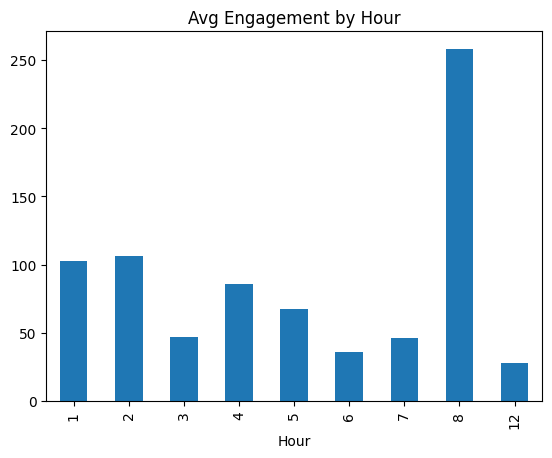

In [103]:
# What time is best to post?
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

df.groupby("Hour")["Engagements"].mean().plot(kind='bar', title="Avg Engagement by Hour")

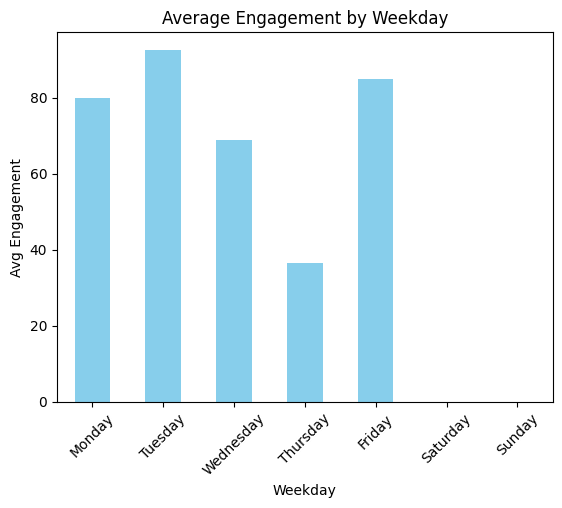

In [104]:
# Engagement by Weekday
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()

weekday_engagement = df.groupby('Weekday')['Engagements'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

weekday_engagement.plot(kind='bar', color='skyblue', title='Average Engagement by Weekday')
plt.ylabel('Avg Engagement')
plt.xticks(rotation=45)
plt.show()


In [105]:
from sklearn.model_selection import train_test_split

# 1. Defining my target variable
# To predict Total Engagements
# (trying to separate models later for Likes, Comments, Shares, etc.)
df['TotalEngagements'] = df['Likes'] + df['Comments'] + df['Shares']

# 2. Defining the features
feature_cols = [
    'Hour',
    'DayOfWeek',
    'PostLength',
    'PostWordCount'
] + [col for col in df.columns if col.startswith('Network_')]  # One-hot encoded platform columns

X = df[feature_cols]
y = df['TotalEngagements']

# 3. Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [106]:
print("Features used:", feature_cols)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Features used: ['Hour', 'DayOfWeek', 'PostLength', 'PostWordCount', 'Network_Facebook', 'Network_TikTok', 'Network_X']
X_train shape: (125, 7)
y_train shape: (125,)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Preprocessing: One-hot encode categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in training and testing sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns in X_test with 0

# Initializing models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Training both models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Making predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

# Evaluating both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)



Linear Regression Results:
MAE: 22.331149379570924
RMSE: 50.07162057804052
R² Score: -3.833461437461846

Random Forest Results:
MAE: 18.041411267201834
RMSE: 38.40599782052366
R² Score: -1.843629877246077


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Defining parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initializing model
rf = RandomForestRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extracting the best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predicting on test set
y_pred_best = best_rf.predict(X_test)

# Evaluating performance
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print("Best Random Forest MAE:", mae)
print("Best Random Forest RMSE:", rmse)
print("Best Random Forest R²:", r2)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest MAE: 19.03365243357559
Best Random Forest RMSE: 41.95500368576787
Best Random Forest R²: -2.3934580897218862
